In [8]:
import geopandas as gp
import matplotlib.pyplot as plt

In [10]:
import seaborn as sns 
sns.set()

In [74]:
import pandas as pd

In [141]:
world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))

In [4]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


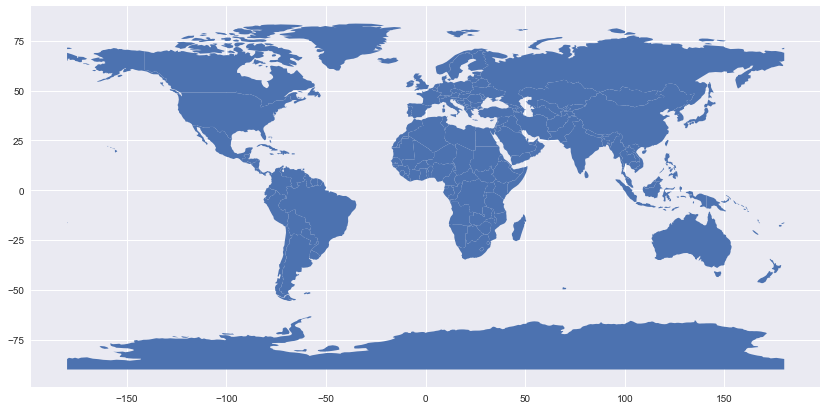

In [142]:
world.plot()
plt.gcf().set_size_inches(15,7)
plt.show()

In [143]:
# Renaming the last column geometry as borders
world = world.rename(columns={'geometry': 'borders'}).set_geometry('borders')

In [144]:
world.columns

Index(['pop_est', 'continent', 'name', 'iso_a3', 'gdp_md_est', 'borders'], dtype='object')

In [ ]:
# Getting the centroids of each country

In [145]:
world['centroid_column'] = world.centroid
world = world.set_geometry('centroid_column')

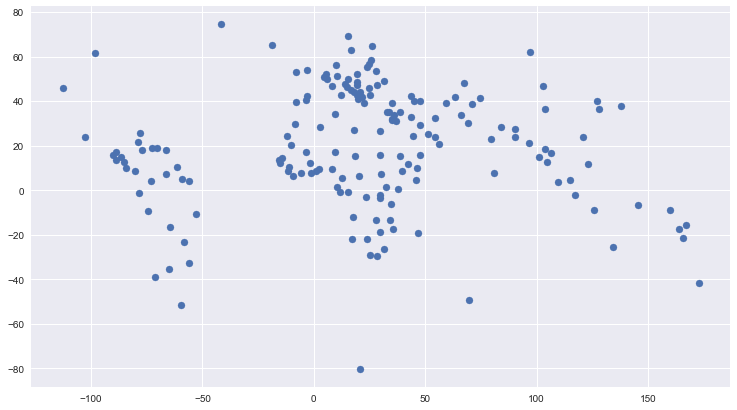

In [146]:
world.plot()
plt.gcf().set_size_inches(15,7)
plt.show()

In [22]:
# Reading a json url file

In [147]:
url = "http://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_110m_land.geojson"
df = gp.read_file(url)

In [148]:
df.head()

,scalerank,featureclass,geometry
0,1,Country,POLYGON ((-59.57209469261153 -80.0401787250963...
1,1,Country,POLYGON ((-159.2081835601977 -79.4970594217087...
2,1,Country,POLYGON ((-45.15475765642103 -78.0470696005867...
3,1,Country,POLYGON ((-121.2115113938571 -73.5009904990060...
4,1,Country,POLYGON ((-125.5595664068953 -73.4813534547352...


### Choropleth Maps

In [ ]:
# Plotting GDP per Capita

In [149]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,borders,centroid_column
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,...",POINT (66.08669022192834 33.85639928169076)
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...,POINT (17.47057255231345 -12.24586903613316)
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,...",POINT (20.03242643144321 41.14135330604877)
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,...",POINT (54.20671476159633 23.86863365334761)
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...,POINT (-65.17536077114174 -35.44682148949509)


In [150]:
world.loc[world['pop_est'] <=0,]
# For some reason the population estimate of Africa is less than 0

,pop_est,continent,name,iso_a3,gdp_md_est,borders,centroid_column
137,-99.0,Africa,W. Sahara,ESH,-99.0,POLYGON ((-8.794883999049077 27.12069631602251...,POINT (-12.13783111160781 24.29117296020862)


In [151]:
world['gdp_per_cap'] = world.gdp_md_est / world.pop_est

In [152]:
world = world[(world.pop_est>0) & (world.name!="Antarctica")]

In [153]:
world = world.set_geometry('borders')

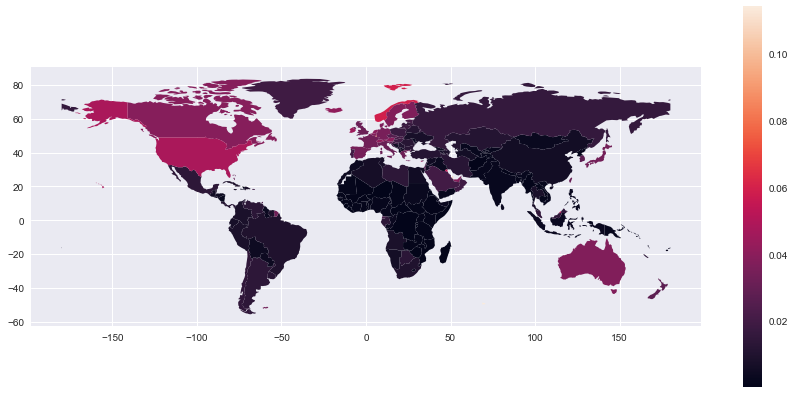

In [154]:
world.plot(column='gdp_per_cap',legend = True)
plt.gcf().set_size_inches(15,7)
plt.show()

In [ ]:
# Setting colors

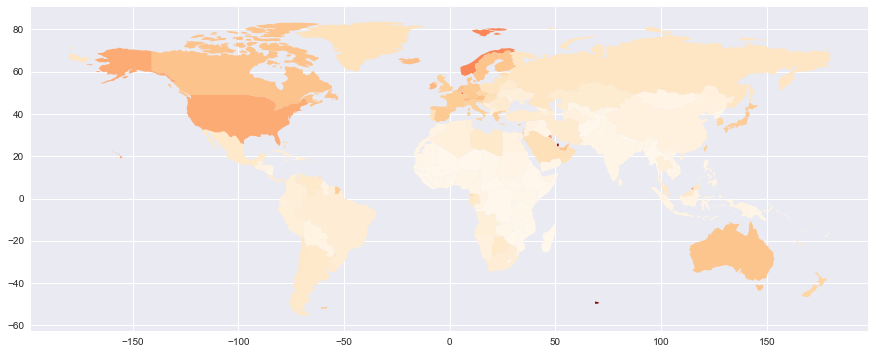

In [41]:
world.plot(column='gdp_per_cap', cmap='OrRd')
plt.gcf().set_size_inches(15,7)
plt.show()

In [ ]:
# Scheme paramter can be used to fill in the color based on a function/ value

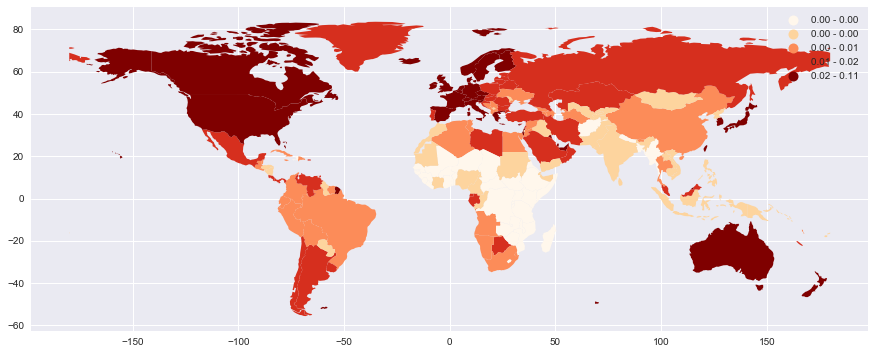

In [155]:
world.plot(column='gdp_per_cap', cmap='OrRd', scheme='quantiles',legend = True)
plt.gcf().set_size_inches(15,7)
plt.show()

### Merging Geospatial data

In [53]:
world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))
world.head()
# data at country level
# Key = iso_a3 or name. would prefer matching with iso_a3 as name mathcing might need more data munching


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


In [69]:
print(world.shape)

(177, 6)


In [58]:
countries = world[['geometry', 'name','iso_a3']]
countries = countries.rename(columns={'name':'country'})

In [70]:
print(countries.columns)
print(countries.shape)

Index(['geometry', 'country', 'iso_a3'], dtype='object')
(177, 3)


In [107]:
cities = gp.read_file(gp.datasets.get_path('naturalearth_cities'))
print(cities.head())
# key = name
# city level data
print(cities.shape)

           name                                     geometry
0  Vatican City  POINT (12.45338654497177 41.90328217996012)
1    San Marino    POINT (12.44177015780014 43.936095834768)
2         Vaduz  POINT (9.516669472907267 47.13372377429357)
3    Luxembourg  POINT (6.130002806227083 49.61166037912108)
4       Palikir  POINT (158.1499743237623 6.916643696007725)
(202, 2)


In [55]:
# Joining these two geodataframes

In [108]:
cities_with_country = gp.sjoin(cities, countries, how="left", op='intersects')
cities_with_country.head()
# at cities level

,name,geometry,index_right,country,iso_a3
0,Vatican City,POINT (12.45338654497177 41.90328217996012),79.0,Italy,ITA
1,San Marino,POINT (12.44177015780014 43.936095834768),79.0,Italy,ITA
2,Vaduz,POINT (9.516669472907267 47.13372377429357),9.0,Austria,AUT
3,Luxembourg,POINT (6.130002806227083 49.61166037912108),97.0,Luxembourg,LUX
4,Palikir,POINT (158.1499743237623 6.916643696007725),NaN,NaN,NaN


In [105]:
print(cities_with_country.shape)

(202, 5)


### Creating a GeoDataFrame from a DataFrame with coordinates

In [114]:
from shapely.geometry import Point
from shapely.geometry import Polygon

In [156]:
# Using New York Green Taxi data 

In [75]:
NYC_GT_data = pd.read_csv('https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2015-09.csv')

In [77]:
NYC_GT_data.shape

(1494926, 21)

In [111]:
NYC_GT_data = NYC_GT_data.loc[1:(1494926*0.3),:]
NYC_GT_data.shape

(448477, 23)

In [81]:
NYC_GT_data.columns

Index(['VendorID', 'lpep_pickup_datetime', 'Lpep_dropoff_datetime',
       'Store_and_fwd_flag', 'RateCodeID', 'Pickup_longitude',
       'Pickup_latitude', 'Dropoff_longitude', 'Dropoff_latitude',
       'Passenger_count', 'Trip_distance', 'Fare_amount', 'Extra', 'MTA_tax',
       'Tip_amount', 'Tolls_amount', 'Ehail_fee', 'improvement_surcharge',
       'Total_amount', 'Payment_type', 'Trip_type '],
      dtype='object')

In [117]:
NYC_GT_data['Pickup_Coordinates'] = list(zip(NYC_GT_data.Pickup_longitude, NYC_GT_data.Pickup_latitude))
NYC_GT_data['Dropoff_Coordinates'] = list(zip(NYC_GT_data.Dropoff_longitude, NYC_GT_data.Dropoff_latitude))

In [118]:
NYC_GT_data['Pickup_Coordinates'].head()

1    (-74.01079559326173, 40.91221618652344)
2    (-73.92140960693358, 40.76670837402344)
3       (-73.92138671875, 40.76667785644531)
4    (-73.95548248291014, 40.71404647827149)
5    (-73.94529724121094, 40.80818557739258)
Name: Pickup_Coordinates, dtype: object

In [ ]:
# Transform them into tuples

In [120]:
NYC_GT_data['Pickup_Coordinates'] = NYC_GT_data['Pickup_Coordinates'].apply(Point)
NYC_GT_data['Dropoff_Coordinates'] =NYC_GT_data['Dropoff_Coordinates'].apply(Point)

In [121]:
NYC_GT_data['Pickup_Coordinates'].head()

1    POINT (-74.01079559326173 40.91221618652344)
2    POINT (-73.92140960693358 40.76670837402344)
3       POINT (-73.92138671875 40.76667785644531)
4    POINT (-73.95548248291014 40.71404647827149)
5    POINT (-73.94529724121094 40.80818557739258)
Name: Pickup_Coordinates, dtype: object

In [122]:
Geo_NYC_GT_data = gp.GeoDataFrame(NYC_GT_data, geometry='Pickup_Coordinates')

In [123]:
Geo_NYC_GT_data = gp.GeoDataFrame(Geo_NYC_GT_data, geometry='Dropoff_Coordinates')

In [124]:
Geo_NYC_GT_data.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type,Pickup_Coordinates,Dropoff_Coordinates
1,2,2015-09-01 00:04:20,2015-09-01 00:04:24,N,5,-74.010796,40.912216,-74.010780,40.912212,1,...,0.0,0.00,0.0,NaN,0.0,45.00,1,2.0,POINT (-74.01079559326173 40.91221618652344),POINT (-74.01078033447266 40.91221237182617)
2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921410,40.766708,-73.914413,40.764687,1,...,0.5,0.50,0.0,NaN,0.3,5.80,1,1.0,POINT (-73.92140960693358 40.76670837402344),POINT (-73.91441345214845 40.76468658447266)
3,2,2015-09-01 00:02:36,2015-09-01 00:06:42,N,1,-73.921387,40.766678,-73.931427,40.771584,1,...,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0,POINT (-73.92138671875 40.76667785644531),POINT (-73.93142700195313 40.77158355712891)
4,2,2015-09-01 00:00:14,2015-09-01 00:04:20,N,1,-73.955482,40.714046,-73.944412,40.714729,1,...,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0,POINT (-73.95548248291014 40.71404647827149),POINT (-73.94441223144531 40.71472930908203)
5,2,2015-09-01 00:00:39,2015-09-01 00:05:20,N,1,-73.945297,40.808186,-73.937668,40.821198,1,...,0.5,1.36,0.0,NaN,0.3,8.16,1,1.0,POINT (-73.94529724121094 40.80818557739258),POINT (-73.93766784667969 40.82119750976563)


In [106]:
cities_with_country.loc[cities_with_country['iso_a3'] == 'USA',:]

,name,geometry,index_right,country,iso_a3
186,"Washington, D.C.",POINT (-77.01136443943716 38.90149523508705),168.0,United States,USA


In [129]:
world.loc[world['iso_a3'] == 'USA',:]

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
168,313973000.0,North America,United States,USA,15094000.0,"(POLYGON ((-155.54211 19.08348000000001, -155...."


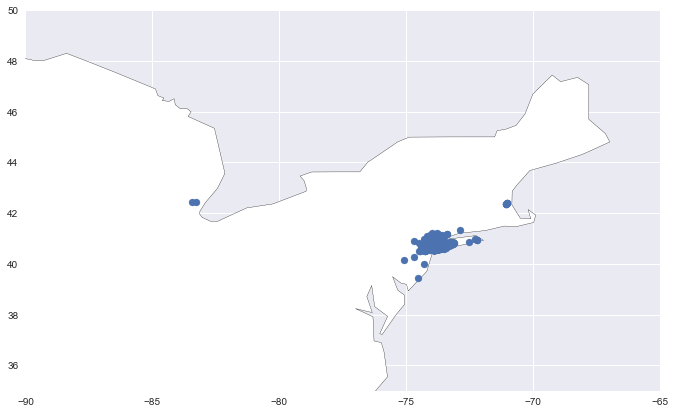

In [134]:
ax = world.loc[world['iso_a3'] == 'USA',:].plot(edgecolor='k', facecolor='white', figsize=(15, 10))

Geo_NYC_GT_data.plot(ax=ax)
ax.set(xlim=(-90, -65), ylim=(35,50))
# plt.gcf().set_size_inches(15,7)
plt.show()